In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cc(i):
    return cv2.cvtColor(i, cv2.COLOR_BGR2RGB)

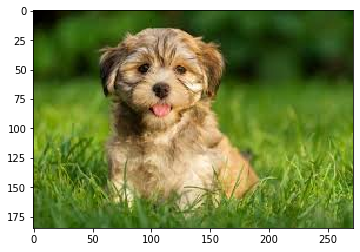

In [25]:
d = cv2.imread('doggy.jpg')
plt.imshow(cc(d))

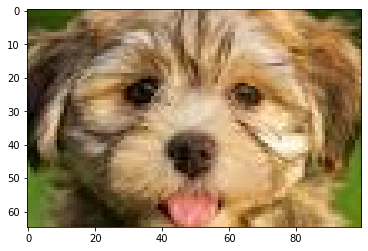

In [27]:
face = d.copy()[25:90, 60:160]
plt.imshow(cc(face))

In [28]:
#In this type of OD, we will already have small part 
#of image, that will be matched in bigger image

In [29]:
face.shape

(65, 100, 3)

In [30]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

cv2.TM_CCOEFF


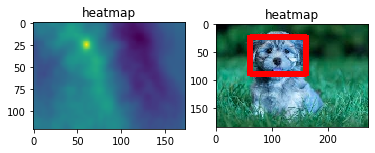




cv2.TM_CCOEFF_NORMED


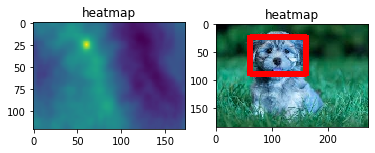




cv2.TM_CCORR


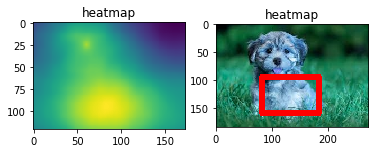




cv2.TM_CCORR_NORMED


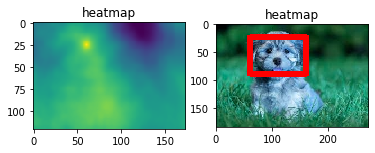




cv2.TM_SQDIFF


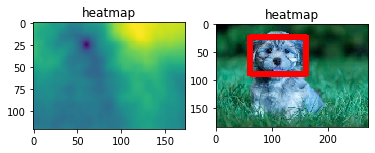




cv2.TM_SQDIFF_NORMED


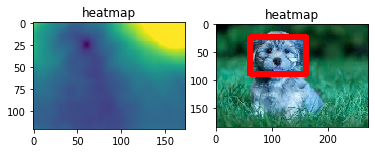

In [38]:
for m in methods:
    
    dog_full_img = d.copy()
    face_img = face.copy()
    
    method = eval(m)
    
    res = cv2.matchTemplate(dog_full_img, face_img, method)
    
    # Grab coordinates and draw rectangle
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left_x = min_loc[0]
        top_left_y = min_loc[1]
    else:
        top_left_x = max_loc[0]
        top_left_y = max_loc[1]
    
    height,width,channels= face.shape
    
    bottom_right_x = top_left_x + width
    bottom_right_y = top_left_y + height
    
    rect =cv2.rectangle(dog_full_img,
                  (top_left_x,top_left_y),
                  (bottom_right_x,bottom_right_y),
                  255, 10)
    
    print(m)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('heatmap')
    
    plt.subplot(122)
    plt.imshow(rect)
    plt.title('heatmap')
    
    plt.show() # to prevent overlap
    
    print('\n\n')

In [33]:
res = cv2.matchTemplate(dog_full_img, face_img, cv2.TM_CCOEFF)

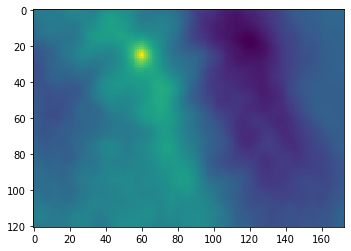

In [34]:
plt.imshow(res)